In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


sumber data 1 : 

sumber data 2 : https://opendata.jabarprov.go.id/id/dataset/jumlah-ibu-hamil-berdasarkan-kabupatenkota-di-jawa-barat

Disusun Oleh :

Ersan Ivanda Putra - (NIM : 00000073319)

Elisabeth Lumban Tobing - (NIM : 00000072804)

Caroline Alexandra Santoso - (NIM : 00000066467)

Florecita Patricia - (NIM : 00000061813) 





```
```

# DATA 1


In [2]:


data1 = pd.read_csv('C:\\Users\\ThinGF63\\Maternal Health Risk Data Set.csv')
data1



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
data1.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


# DATA 2

In [5]:
data2 = pd.read_csv('C:\\Users\\ThinGF63\\data hamil jabar.csv')
data2

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,126474,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,51056,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,46284,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,79912,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,62514,ORANG,2016
...,...,...,...,...,...,...,...,...
184,185,32,JAWA BARAT,3275,KOTA BEKASI,54212,ORANG,2022
185,186,32,JAWA BARAT,3276,KOTA DEPOK,47022,ORANG,2022
186,187,32,JAWA BARAT,3277,KOTA CIMAHI,10570,ORANG,2022
187,188,32,JAWA BARAT,3278,KOTA TASIKMALAYA,11705,ORANG,2022


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   189 non-null    int64 
 1   kode_provinsi        189 non-null    int64 
 2   nama_provinsi        189 non-null    object
 3   kode_kabupaten_kota  189 non-null    int64 
 4   nama_kabupaten_kota  189 non-null    object
 5   jumlah_ibu_hamil     189 non-null    int64 
 6   satuan               189 non-null    object
 7   tahun                189 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 11.9+ KB


In [7]:
data2.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_ibu_hamil,tahun
count,189.000000,189.0,189.000000,189.000000,189.000000
mean,95.000000,32.0,3231.333333,35401.751323,2019.000000
std,54.703748,0.0,31.284725,27281.827540,2.005312
min,1.000000,32.0,3201.000000,2966.000000,2016.000000
25%,48.000000,32.0,3207.000000,17789.000000,2017.000000
50%,95.000000,32.0,3214.000000,29638.000000,2019.000000
75%,142.000000,32.0,3273.000000,46972.000000,2021.000000
max,189.000000,32.0,3279.000000,128743.000000,2022.000000


## PENGELOMPOKAN AGE PADA DATA 1

In [8]:
subset_data1 = data1[['Age']]
umur1 = subset_data1[(subset_data1['Age'] >= 15) & (subset_data1['Age'] <= 19)]
umur1

,Age
11,19
15,15
23,18
25,16
26,19
...,...
989,17
990,19
992,17
1005,17


In [9]:
subset_data1 = data1[['Age']]
umur2 = subset_data1[(subset_data1['Age'] >= 20) & (subset_data1['Age'] <= 24)]
umur2

,Age
5,23
6,23
10,23
13,20
22,21
...,...
939,21
945,22
947,23
950,23


In [10]:
subset_data1 = data1[['Age']]
umur3 = subset_data1[(subset_data1['Age'] >= 25) & (subset_data1['Age'] <= 28)]
umur3

,Age
0,25
12,25
17,25
29,28
42,25
...,...
971,28
981,25
984,28
988,25


In [11]:
subset_data1 = data1[['Age']]
umur4 = subset_data1[(subset_data1['Age'] >= 29) & (subset_data1['Age'] <= 33)]
umur4

,Age
2,29
3,30
8,32
18,30
43,30
...,...
977,30
978,29
985,32
995,32


In [12]:
subset_data1 = data1[['Age']]
umur5 = subset_data1[(subset_data1['Age'] >= 34) & (subset_data1['Age'] <= 38)]
umur5

,Age
1,35
4,35
7,35
39,35
52,35
...,...
958,37
964,35
991,37
997,35


In [13]:
subset_data1 = data1[['Age']]
umur6 = subset_data1[(subset_data1['Age'] >= 39) & (subset_data1['Age'] <= 43)]
umur6

,Age
9,42
20,40
46,42
57,42
108,42
...,...
983,40
994,40
999,40
1007,40


In [14]:
subset_data1 = data1[['Age']]
umur7 = subset_data1[(subset_data1['Age'] >= 44) & (subset_data1['Age'] <= 48)]
umur7

,Age
14,48
38,45
74,44
102,48
120,48
129,48
186,45
206,48
228,48
282,45


In [15]:
X = data1['Age'].values.reshape(-1, 1)
y = data1[['SystolicBP', 'DiastolicBP']]
X, y

(array([[25],
        [35],
        [29],
        ...,
        [35],
        [43],
        [32]], dtype=int64),
       SystolicBP  DiastolicBP
 0            130           80
 1            140           90
 2             90           70
 3            140           85
 4            120           60
 ...          ...          ...
 1009         120           60
 1010         120           90
 1011          85           60
 1012         120           90
 1013         120           65
 
 [1014 rows x 2 columns])

## COMBINE DATA 1 DAN DATA 2

In [16]:
combined_data = pd.concat([data1, data2], ignore_index=True)

print("Merging Result:")
print(combined_data)


Merging Result:
       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0     25.0       130.0         80.0  15.0      98.0       86.0  high risk   
1     35.0       140.0         90.0  13.0      98.0       70.0  high risk   
2     29.0        90.0         70.0   8.0     100.0       80.0  high risk   
3     30.0       140.0         85.0   7.0      98.0       70.0  high risk   
4     35.0       120.0         60.0   6.1      98.0       76.0   low risk   
...    ...         ...          ...   ...       ...        ...        ...   
1198   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1199   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1200   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1201   NaN         NaN          NaN   NaN       NaN        NaN        NaN   
1202   NaN         NaN          NaN   NaN       NaN        NaN        NaN   

         id  kode_provinsi nama_provinsi  kode_kabupaten_ko

## MELIHAT MISSING VALUES

In [17]:
missing_values_numeric = combined_data.select_dtypes(include='number').isna().sum()
print("Missing values for numeric columns:")
print(missing_values_numeric)


Missing values for numeric columns:
Age                     189
SystolicBP              189
DiastolicBP             189
BS                      189
BodyTemp                189
HeartRate               189
id                     1014
kode_provinsi          1014
kode_kabupaten_kota    1014
jumlah_ibu_hamil       1014
tahun                  1014
dtype: int64


## MENGATASI NILAI YG MISSING VALUES

In [18]:
numeric_columns = combined_data.select_dtypes(include='number')
combined_data_filled = combined_data.copy()  # Membuat salinan DataFrame untuk menghindari perubahan langsung

for column in numeric_columns.columns:
    combined_data_filled[column] = combined_data[column].fillna(combined_data[column].mean())

# Mencetak DataFrame setelah pengisian nilai
print("DataFrame after value filling:")
print(combined_data_filled)


DataFrame after value filling:
            Age  SystolicBP  DiastolicBP         BS    BodyTemp  HeartRate  \
0     25.000000  130.000000    80.000000  15.000000   98.000000  86.000000   
1     35.000000  140.000000    90.000000  13.000000   98.000000  70.000000   
2     29.000000   90.000000    70.000000   8.000000  100.000000  80.000000   
3     30.000000  140.000000    85.000000   7.000000   98.000000  70.000000   
4     35.000000  120.000000    60.000000   6.100000   98.000000  76.000000   
...         ...         ...          ...        ...         ...        ...   
1198  29.871795  113.198225    76.460552   8.725986   98.665089  74.301775   
1199  29.871795  113.198225    76.460552   8.725986   98.665089  74.301775   
1200  29.871795  113.198225    76.460552   8.725986   98.665089  74.301775   
1201  29.871795  113.198225    76.460552   8.725986   98.665089  74.301775   
1202  29.871795  113.198225    76.460552   8.725986   98.665089  74.301775   

      RiskLevel     id  kode_pro

## Modeling

In [19]:

X = combined_data_filled[[ 'SystolicBP', 'DiastolicBP']]
y = combined_data_filled["Age"]



In [20]:

X = combined_data_filled[['SystolicBP', 'DiastolicBP']]
y = combined_data_filled["Age"]
model = LinearRegression()

# Initialize K-Fold with 5 folds
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=k_fold, scoring='neg_mean_squared_error')

# Display the results
print("Cross-Validation Results (Negative Mean Squared Error):")
print(cv_scores)
print("Average Negative Mean Squared Error: {:.2f}".format(cv_scores.mean()))







Cross-Validation Results (Negative Mean Squared Error):
[-111.09432264 -143.16745451 -150.46202301 -116.11028847 -103.1533693 ]
Average Negative Mean Squared Error: -124.80


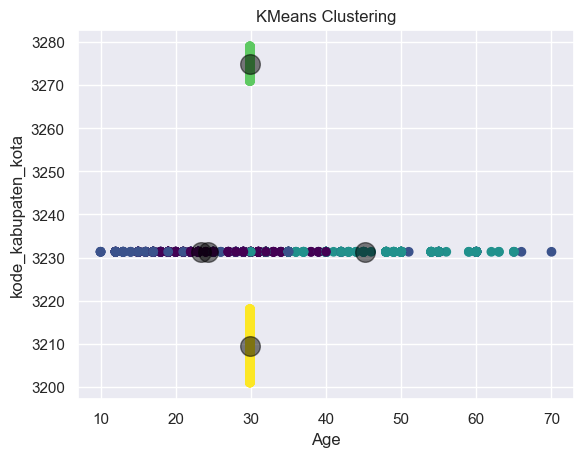

In [21]:

X = combined_data_filled[['Age', 'kode_kabupaten_kota', 'SystolicBP', 'DiastolicBP']]

# Melakukan KMeans clustering dengan 2 cluster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data
labels = kmeans.labels_

# Mendapatkan pusat cluster
centers = kmeans.cluster_centers_

# Plot hasil clustering
plt.scatter(X.values[:, 0], X.values[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('kode_kabupaten_kota')
plt.title('KMeans Clustering')
plt.show()


## Corelation Data

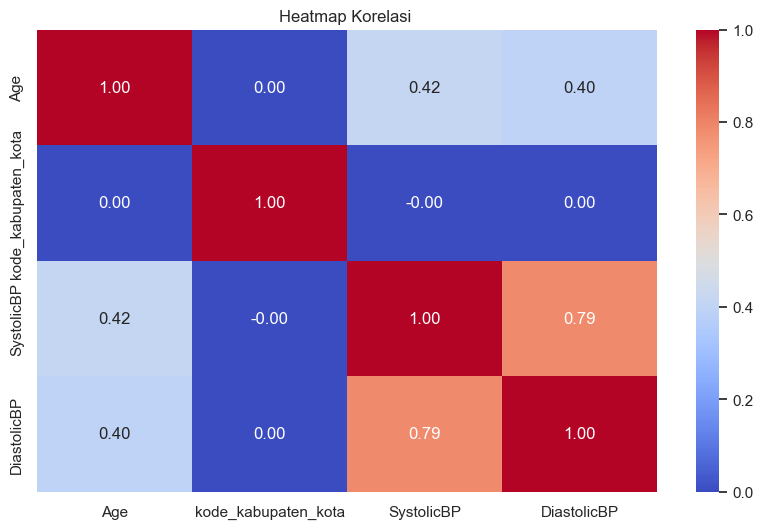

In [22]:



columns_to_visualize = ['Age', 'kode_kabupaten_kota', 'SystolicBP', 'DiastolicBP']
data_to_visualize = combined_data_filled[columns_to_visualize]

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data_to_visualize.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Heatmap Korelasi ')
plt.show()



## Evaluation 

 Silhouette Score

In [23]:

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)


cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_labels)

print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.3782841102697717


Davies-Bouldin Index

In [24]:

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
cluster_labels = kmeans.labels_


davies_bouldin = davies_bouldin_score(X, cluster_labels)
print("The Davies-Bouldin Index is:", davies_bouldin)

The Davies-Bouldin Index is: 1.0133468486176869


Elbow Method

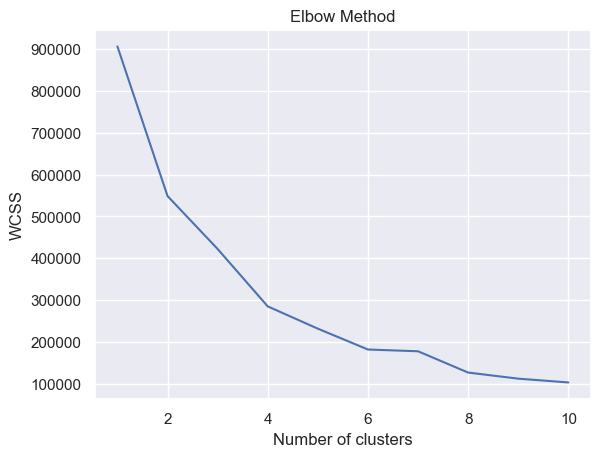

In [25]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


SSE ( Sum Squared Error)

In [26]:
from sklearn.cluster import KMeans


X = combined_data_filled[['Age', 'kode_kabupaten_kota', 'SystolicBP', 'DiastolicBP']]

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Menghitung SSE (Sum of Squared Errors)
sse = kmeans.inertia_

print("SSE (Sum of Squared Errors):", sse)


SSE (Sum of Squared Errors): 231856.50949825576


##  Visualisasi 

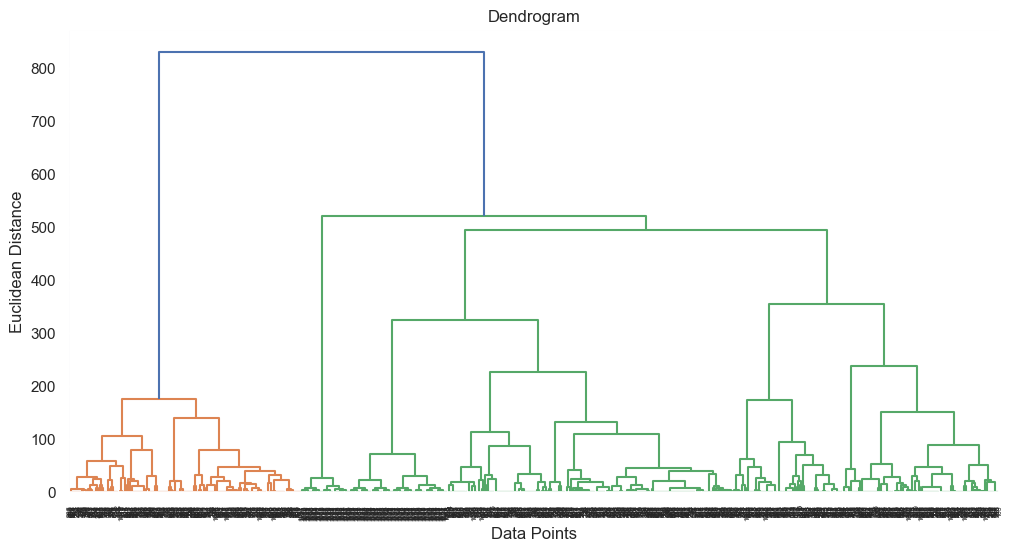

In [27]:

# Menghitung matriks jarak
D = sch.distance.pdist(combined_data_filled[['Age', 'kode_kabupaten_kota', 'SystolicBP', 'DiastolicBP']])

# Membuat dendrogram
Z = sch.linkage(D, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

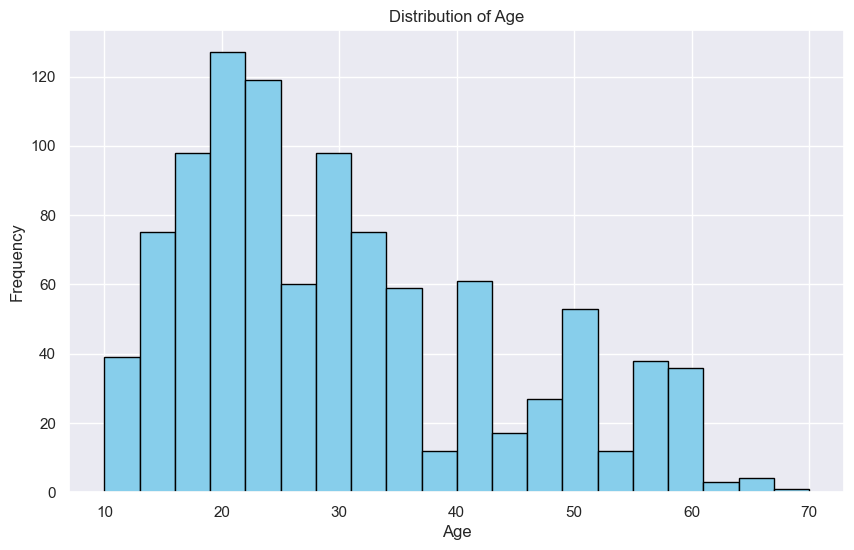

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data1['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()